In [4]:
import os
import sys
DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/MLQD'
path_to_file = str(DIR) + '/' + 'evolution.py'
if os.path.isfile(path_to_file):
    MLQD_DIR = DIR
else:
    MLQD_DIR = os.getcwd() + '/MLQD'
if MLQD_DIR not in sys.path:
    sys.path.append(MLQD_DIR)

In [5]:
import numpy as np
from evolution import quant_dyn
import matplotlib.pyplot as plt

We consider spin-boson model as was consider in our published study https://iopscience.iop.org/article/10.1088/1367-2630/ac3261

\begin{align} \label{eq:sb}
    \boldsymbol{\rm H} = \frac{1}{2}\epsilon \boldsymbol{\sigma}_{z}  + \frac{1}{2}\Delta \boldsymbol{\sigma}_{x} + \sum_{k} \omega_k \boldsymbol{\rm b}_k^\dagger \boldsymbol{\rm b}_k + \frac{1}{2} \boldsymbol{\sigma}_z \boldsymbol{\rm F},
\end{align}
here $\boldsymbol{\sigma}_z$ and $\boldsymbol{\sigma}_x$ are the Pauli matrices, i.e., $\boldsymbol{\sigma}_z = | e\rangle \langle e| - | g \rangle \langle g|$, $\boldsymbol{\sigma}_x =  |e\rangle \langle g| + | g \rangle \langle  e|$. $\epsilon$ and $\Delta$ are the energy bias and tunneling matrix element, respectively. $\omega_k$ is the frequency corresponds to $k$ bath mode and $\boldsymbol{\rm b}_k^\dagger$ is the corresponding bath creation operator. $\boldsymbol{\rm F}$ is the interaction operator and can be expressed as $\boldsymbol{\rm F} = \sum_k \frac{c_k}{\sqrt{2 \omega_k}} (\boldsymbol{\rm b}_k + \boldsymbol{\rm b}_k^\dagger)$, where $c_k$ denotes the coupling strength between system and $k$ bath mode. Initially, we consider that the system is in the excited state $|e\rangle$ (by absorbing a photon of energy equal to the energy gap between the two states) and we let the system to be relaxed by exchanging its energy with the bath.  

We consider the Drude–Lorentz spectral density 
$$
    J_{\text{b}}(\omega)=2 \lambda \frac{\omega \gamma}{\omega^{2}+\gamma^{2}},
$$
with $\gamma$ as characteristic frequency and $\lambda$ as the reorganization energy.

We use the Hierarchical equations of motion (HEOM) approach and generate data for all the possible combinations of the following parameters: $\epsilon = \{0, 1\}$, the reorganization energy $\lambda \in \{0.1$, $0.2$, $0.3$, $0.4$, $0.5$, $0.6$, $0.7$, $0.8$, $0.9$, $1.0 \},$ the characteristic frequency $\gamma \in \{1$, $2$, $3$, $4$, $5$, $6$, $7$, $8$, $9$, $10\},$ inverse temperature $\beta = 1/T \in \{0.1$, $0.25$, $0.5$, $0.75$, $1\}$. It should be noted that all parameters are in atomic units (a.u.). 

We generate 500 trajectories for each case (symmetric and asymmetric $\epsilon = \{0, 1\}$) and then train a CNN model following the OSTL approach. You can grab the trajectories from our **QDDSET-1 dataset** [Coming Soon]. **However, here for the sake of demonstration, we provide few trajectories in the ```examples/sb_data``` folder.** We are also providing the ready made models trained on 400 trajectories for each case. [Coming Soon]

## OSTL approach

We prepare our training using parameters {$\epsilon$, $\Delta$, $\gamma$,  $\lambda$,  $T$}.

The OSTL was trained on and also predicts the whole dynamics in one shot in the following format $$\boldsymbol{\mathcal{Y}}(t_0), \boldsymbol{\mathcal{Y}}(t_1), \dots, \boldsymbol{\mathcal{Y}}(t_{k-1}), \boldsymbol{\mathcal{Y}}(t_k),  \boldsymbol{\mathcal{Y}}(t_{k+1}), \dots,  \boldsymbol{\mathcal{Y}}(t_M)$$ 
where 
$$\boldsymbol{\mathcal{Y}}(t) = \mathcal{R}[\rho_{11}(t)], \mathcal{R}[\rho_{12}(t)], \mathcal{I}[\rho_{12}(t)] \dots, \mathcal{R}[\rho_{1N}(t)], \mathcal{I}[\rho_{1N}(t)], \mathcal{R}[\rho_{22}(t)], \dots, \mathcal{R}[\rho_{2N}(t)], \mathcal{I}[\rho_{2N}(t)], \mathcal{R}[\rho_{33}(t)], \dots, \mathcal{R}[\rho_{3N}(t)],\mathcal{I}[\rho_{3N}(t)],\dots, \dots,   \mathcal{R}[\rho_{NN}(t)]$$ 

where $N$ is the dimension of the reduced density matrix and $\mathcal{R}$ and $\mathcal{I}$ represent the real and imaginary parts of the off-diagonal terms, respectively.  

More details are here 

[One-Shot Trajectory Learning of Open Quantum Systems Dynamics]( https://doi.org/10.1021/acs.jpclett.2c01242 "Named link title") 

### 2. Training with preparation of training data and optimization of the CNN model

We provide 20 trajectories in ```Jupyter_Notebooks/sb_data/``` for the sake of demonstration. Each trajectory is propagated with HEOM method upto ```t= 20 (a.u.)``` with time-step ```dt = 0.05```. 

In [6]:
param={ 
        'n_states': 2,                  # int:  Number of states (SB) or sites (FMO), default 2 (SB) and 7 (FMO).
        'QDmodel': 'createQDmodel',     # str: createQDmodel, the dafault option is useQDmodel
        'QDmodelType': 'OSTL',          # str: Type of model. The default option is OSTL
        'prepInput' : True,             # str: Prepare input files from the data (Default False)
        'XfileIn': 'x_data',            # str: (Optional, npy file) The prepared X file will be saved at the provided file name 
        'YfileIn': 'y_data',            # str: (Optional, npy file) The prepared Y file will be saved at the provided file name 
        'energyNorm': 1.0,                      # float: Normalizer for energy difference. Default value is 1.0 (adopted in the provided trained models)
        'DeltaNorm': 1.0,                       # float: Normalizer for Delta. Default value is 1.0 (adopted in the provided trained models)
        'gammaNorm': 10,               # float: Normalizer for Characteristic frequency. Default value is 500 in the case of FMO complex and 10 in the case of spin-boson model. The same values are also adopted in the provided trained models  
        'lambNorm': 1.0,                # float: Normalizer for System-bath coupling strength. Default value is 520 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models 
        'tempNorm': 1.0,                # float: Normalizer for temperature. Default value is 510 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models.
        'systemType': 'SB',            # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'hyperParam': True,             # bool: Default is False, we can pass True (optimize the hyperparameters) or False (don't optimize and run with the default structure)
        'patience': 10,                 # int: Patience for early stopping in CNN training
        'dataPath': 'sb_data',         # str: Data path
        'QDmodelOut': 'OSTL_SB_model'  # str: (Optional), providing a name to save the model at
        }
quant_dyn(**param)

*****************************************
The MLQD is running with the option QDmodel =  createQDmodel
Setting ML Model Type "QDmodelType" to OSTL
Setting "systemType" to SB
Setting option "prepInput" to True
MLQD Model will be saved as OSTL_SB_model
Setting number of states "n_states" to 2
Setting energy difference normalizeer "energyNorm" to 1.0
Setting tunneling matrix element normalizeer "DeltaNorm" to 1.0
Setting gamma normalizeer "gammaNorm" to 10
Setting lambda normalizer "lambNormalizer" to 1.0
Setting temperature normalizer "tempNorm" to 1.0
Xfilein is x_data
YfileIn is y_data
You have chosen to optimize the hyper parameters of the model
Setting patience for early stopping to 10
*****************************************
train_ml.OSTL: preparing training data for OSTL model
*****************************************
prep_input.OSTL: Grabbing data from " sb_data " directory
prep_input.OSTL: It is assumed that the data is in the format as adopted in our QDDSET-1 dataset , otherwis

### 2. Training with preparation of training data but No optimization of the CNN model

In [7]:
param={ 
        'n_states': 2,                  # int:  Number of states (SB) or sites (FMO), default 2 (SB) and 7 (FMO).
        'QDmodel': 'createQDmodel',     # str: createQDmodel, the dafault option is useQDmodel
        'QDmodelType': 'OSTL',          # str: Type of model. The default option is OSTL
        'prepInput' : True,             # str: Prepare input files from the data (Default False)
        'XfileIn': 'x_data',            # str: (Optional, npy file) The prepared X file will be saved at the provided file name 
        'YfileIn': 'y_data',            # str: (Optional, npy file) The prepared Y file will be saved at the provided file name 
        'energyNorm': 1.0,              # float: Normalizer for energy difference. Default value is 1.0 (adopted in the provided trained models)
        'DeltaNorm': 1.0,               # float: Normalizer for Delta. Default value is 1.0 (adopted in the provided trained models)
        'gammaNorm': 10,               # float: Normalizer for Characteristic frequency. Default value is 500 in the case of FMO complex and 10 in the case of spin-boson model. The same values are also adopted in the provided trained models  
        'lambNorm': 1.0,                # float: Normalizer for System-bath coupling strength. Default value is 520 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models 
        'tempNorm': 1.0,                # float: Normalizer for temperature. Default value is 510 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models.
        'systemType': 'SB',            # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'hyperParam': False,             # bool: Default is False, we can pass True (optimize the hyperparameters) or False (don't optimize and run with the default structure)
        'patience': 10,                 # int: Patience for early stopping in CNN training
        'dataPath': 'sb_data',         # str: Data path
        'QDmodelOut': 'OSTL_SB_model'  # str: (Optional), providing a name to save the model at
        }
quant_dyn(**param)

*****************************************
The MLQD is running with the option QDmodel =  createQDmodel
Setting ML Model Type "QDmodelType" to OSTL
Setting "systemType" to SB
Setting option "prepInput" to True
MLQD Model will be saved as OSTL_SB_model
Setting number of states "n_states" to 2
Setting energy difference normalizeer "energyNorm" to 1.0
Setting tunneling matrix element normalizeer "DeltaNorm" to 1.0
Setting gamma normalizeer "gammaNorm" to 10
Setting lambda normalizer "lambNormalizer" to 1.0
Setting temperature normalizer "tempNorm" to 1.0
Xfilein is x_data
YfileIn is y_data
You have chosen not to optimize the hyper parameters of the model
Setting patience for early stopping to 10
*****************************************
train_ml.OSTL: preparing training data for OSTL model
*****************************************
prep_input.OSTL: Grabbing data from " sb_data " directory
prep_input.OSTL: It is assumed that the data is in the format as adopted in our QDDSET-1 dataset , othe

### 3. Training without preparation of training data and optimization of the CNN model. 

In this example, we will not prepare the training data and will directly pass the X and Y files as were prepared in demonstration 1 or 2 

In [8]:
param={ 
        'n_states': 2,                  # int:  Number of states (SB) or sites (FMO), default 2 (SB) and 7 (FMO).
        'QDmodel': 'createQDmodel',     # str: createQDmodel, the dafault option is useQDmodel
        'QDmodelType': 'OSTL',          # str: Type of model. The default option is OSTL
        'systemType': 'SB',            # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'XfileIn': 'x_data',            # str: (Not Optional, npy file) The X file 
        'YfileIn': 'y_data',            # str: (Not Optional, npy file) The X file
        'hyperParam': False,             # bool: Default is False, we can pass True (optimize the hyperparameters) or False (don't optimize and run with the default structure)
        'patience': 10,                 # int: Patience for early stopping in CNN training
        'QDmodelOut': 'OSTL_SB_model'  # str: (Optional), providing a name to save the model at
        }
quant_dyn(**param)

*****************************************
The MLQD is running with the option QDmodel =  createQDmodel
Setting ML Model Type "QDmodelType" to OSTL
Setting "systemType" to SB
The MLQD is running with default "prepInput" option False
MLQD Model will be saved as OSTL_SB_model
Setting number of states "n_states" to 2
Running with the default value of energy difference normalizeer; energyNorm = 1.0 (used in the provided trained spin-boson models)
Running with the default value of tunneling matrix element normalizeer; DeltaNorm = 1.0 (used in the provided trained spin-boson models)
Running with the default value of gamma normalizeer; gammaNorm = 10 (used in the provided trained spin-boson models)
Running with the default value of lambda normalizer; lambNorm = 1.0 (used in the provided trained spin-boson models)
Running with the default value of temperature normalizer; tempNorm = 1.0 (used in the provided trained spin-boson models)
Xfilein is x_data
YfileIn is y_data
You have chosen not to op

Epoch 61/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 114ms/epoch - 114ms/step
Epoch 62/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 100ms/epoch - 100ms/step
Epoch 63/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 89ms/epoch - 89ms/step
Epoch 64/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 92ms/epoch - 92ms/step
Epoch 65/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 111ms/epoch - 111ms/step
Epoch 66/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 88ms/epoch - 88ms/step
Epoch 67/10000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0056 - 74ms/epoch - 74ms/step
Epoch 68/10000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0056 - 85ms/epoch - 85ms/step
Epoch 69/10000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0056 - 88ms/epoch - 88ms/step
Epoch 70/10000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0056 - 67ms/epoch - 67ms/step
Epoch 71/10000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0056 - 91ms/epoch - 91ms/step
Epoch 72/10000
1/1 - 0s - loss: 0.0054 - val_loss: 0.0056 - 85ms/epoch - 85ms/ste

# Propagating dynamics with the trained OSTL model 

Here we will demonstrate how to propagate dynamics with the model we trained above "OSTL_SB_model.hdf5". We will provide the simulation parameters and the OSTL will predict the corresponding dynamics

In [10]:
param={ 
        'n_states': 2,                          # int:  Number of states (SB) or sites (FMO). Default is 2 (SB) and 7 (FMO).
        'time': 20,                             # float: Propagation time in picoseconds (ps)  for FMO complex and in (a.u.) for spin-boson model
        'time_step': 0.05,                      # float: Time-step for time-propagation (OSTL does not use it, however will use it in the output file). Default values are 0.1 (KRR SB), 0.05 (AIQD and OSTL for spin-boson model) and 0.005ps for FMO complex
        'energyDiff': 1.0,                      # float: Energy difference between the two states (in the unit of (a.u.)). Only required in SB model
        'Delta': 1.0,                           # float: The tunneling matrix element (in the unit of (a.u.)). Only required in SB model
        'gamma': 4.0,                           # float: Characteristic frequency (in cm^-1 for the provided trained FMO models, in (a.u.) for spin-boson model)
        'lamb': 0.1,                             # float: System-bath coupling strength  (in cm^-1 for the provided trained FMO models, in (a.u.) for spin-boson model)
        'temp': 1.0,                            # float: temperature in K  (in Kilven for the provided trained FMO models, in (a.u.) for spin-boson model)
        'energyNorm': 1.0,                      # float: Normalizer for energy difference. Default value is 1.0 (adopted in the provided trained models)
        'DeltaNorm': 1.0,                       # float: Normalizer for Delta. Default value is 1.0 (adopted in the provided trained models)
        'gammaNorm': 10.0,                       # float: Normalizer for Characteristic frequency. Default value is 500 in the case of FMO complex and 10 in the case of spin-boson model. The same values are also adopted in the provided trained models  
        'lambNorm': 1.0,                        # float: Normalizer for System-bath coupling strength. Default value is 520 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models 
        'tempNorm': 1.0,                        # float: Normalizer for temperature. Default value is 510 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models.
      
        'QDmodel': 'useQDmodel',                # str: In MLQD, the dafault option is useQDmodel tells the MLQD to propagate dynamics with an existing trained model
        'QDmodelType': 'OSTL',                  # str: The type of model we wanna use, here AIQD. The default option is OSTL
        'systemType': 'SB',                     # str: (Not optional)  Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'QDmodelIn': 'OSTL_SB_model.hdf5',      # str: (Not Optional for useQDmodel), provide the name of the trained ML model
        'QDtrajOut': 'Qd_trajectory'            # str: (Optional), File name where the trajectory should be saved 
        }
quant_dyn(**param)

*****************************************
The MLQD is running with the option QDmodel =  useQDmodel
Setting ML Model Type "QDmodelType" to OSTL
Setting "systemType" to SB
Setting propagation time "time" to 20
Setting time_step to 0.05
Using the trained model "OSTL_SB_model.hdf5" for dynamics prediction
Setting number of states "n_states" to 2
Setting cutt-off frequency "gamma" to 4.0
Setting system-bath coupling strength "lambda" to 0.1
Setting temperature value "temp" to 1.0
Setting energy difference normalizeer "energyNorm" to 1.0
Setting tunneling matrix element normalizeer "DeltaNorm" to 1.0
Setting gamma normalizeer "gammaNorm" to 10.0
Setting lambda normalizer "lambNormalizer" to 1.0
Setting temperature normalizer "tempNorm" to 1.0
Setting energy difference between two states "energyDiff" to 1.0
Setting tunneling matrix element of the two states "Delta" to 1.0
*****************************************
Model: "sequential_2"
_________________________________________________________

Text(0.5, 1.0, 'Time evolution of the excited state \n population in the spin-boson model')

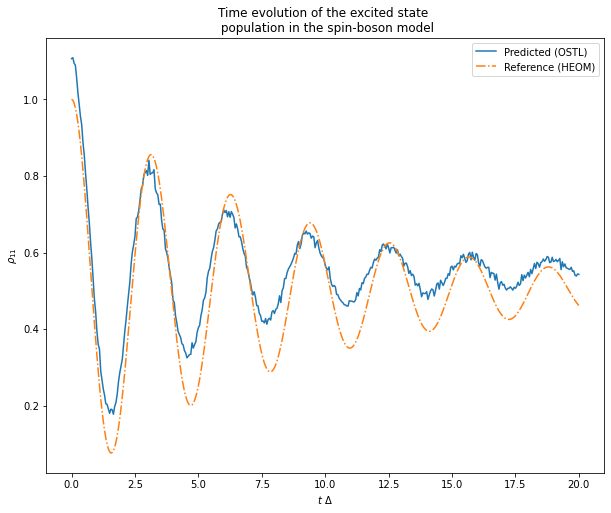

In [12]:
heom_dyn = np.load('test_set/sb/2_epsilon-0.0_Delta-1.0_lambda-0.1_gamma-4.0_beta-1.0.npy')
pred_dyn = np.load('Qd_trajectory.npy')
t_1 = np.real(heom_dyn[:,0])
t_2 = pred_dyn[:,0]
pred_state_1_pop = pred_dyn[:,1]
heom_state_1_pop = np.real(heom_dyn[:,1])

plt.rcParams['font.size'] = '20'
plt.figure(figsize=(10,8))
plt.plot(t_2, pred_state_1_pop, )
plt.plot(t_1, heom_state_1_pop, '-.')
plt.xlabel(r'$t \ \Delta$')
plt.ylabel(r'$\rho_{11}$')
plt.legend(["Predicted (OSTL)", 'Reference (HEOM)'])
plt.title('Time evolution of the excited state \n population in the spin-boson model')

**As can be seen from the figure, the CNN model needs to be optimized and trained with more epochs**